In [83]:
# Import all the needed libraries

import pandas as pd
import plotly.express as px
import folium
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [84]:
# Loading data

url = 'https://raw.githubusercontent.com/mturner49/data-viz-final-project/main/2014VAERSData.csv'
df = pd.read_csv(url, index_col=0, encoding='unicode_escape')
df.head()

RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX    RPT_DATE  \
VAERS_ID                                                                
518048    01/01/2014    OH    43.00     43.0      NaN   F  01/01/2014   
518049    01/01/2014    ME     1.11      1.0      0.1   M  01/01/2014   
518050    01/01/2014    TX    60.00     60.0      NaN   F  01/01/2014   
518051    01/01/2014    GA     0.78      0.0      0.8   M  01/01/2014   
518052    01/01/2014    TX    32.00     32.0      NaN   F  01/01/2014   

                                               SYMPTOM_TEXT DIED DATEDIED  \
VAERS_ID                                                                    
518048    Hot pain at injection site; fever; fatigue; he...  NaN      NaN   
518049                Red, hard bump at sight of injection.  NaN      NaN   
518050         Fast heart rate, head ache, weakness, fever.  NaN      NaN   
518051    Baby had a hard time swallowing food and bottl...  NaN      NaN   
518052    Severe ongoing headaches, severe vomiting afte...  NaN      NaN   

          ... CUR_ILL                                            HISTORY  \
VAERS_ID  ...                                                              
518048    ...    None                                 Allergy to Allegra   
518049    ...     NaN                                                NaN   
518050    ...      No  Kidney Transplant. Allergies: quine, penicilli...   
518051    ...      No  Low muscle tone, open PDA, Moderate Pulmonary ...   
518052    ...      No                                                 No   

         PRIOR_VAX  SPLTTYPE FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT  \
VAERS_ID                                                                    
518048         NaN       NaN         1         NaN          NaN       NaN   
518049         NaN       NaN         1         NaN          NaN       NaN   
518050         NaN       NaN         1         NaN          NaN       NaN   
518051         NaN       NaN         1         NaN          NaN       NaN   
518052         NaN       NaN         1         NaN          NaN       NaN   

         ER_ED_VISIT  ALLERGIES  
VAERS_ID                         
518048           NaN        NaN  
518049           NaN        NaN  
518050           NaN        NaN  
518051           NaN        NaN  
518052           NaN        NaN  

[5 rows x 34 columns]

In [85]:
def missing_cnt_percent(df):
    # create df that consists of columns and the number of missing values for each 
    data = df.isnull().sum().sort_values(ascending=False)
    missing_df = pd.DataFrame(data=data, columns=['missing_cnt'])

    # add column and fill it with the percentage of those missing values
    missing_df['percent_missing'] = missing_df.missing_cnt.apply(lambda x : '{:.2f}'.format(x/df.shape[0] * 100)).apply(pd.to_numeric)
    missing_df = missing_df[missing_df.percent_missing > 50.0]
    return missing_df

In [86]:
miss_df = missing_cnt_percent(df)

In [87]:
for col in miss_df.index:
    df.drop(col, axis=1, inplace=True)

In [88]:
df.head()

RECVDATE STATE  AGE_YRS  CAGE_YR SEX    RPT_DATE  \
VAERS_ID                                                       
518048    01/01/2014    OH    43.00     43.0   F  01/01/2014   
518049    01/01/2014    ME     1.11      1.0   M  01/01/2014   
518050    01/01/2014    TX    60.00     60.0   F  01/01/2014   
518051    01/01/2014    GA     0.78      0.0   M  01/01/2014   
518052    01/01/2014    TX    32.00     32.0   F  01/01/2014   

                                               SYMPTOM_TEXT RECOVD  \
VAERS_ID                                                             
518048    Hot pain at injection site; fever; fatigue; he...      N   
518049                Red, hard bump at sight of injection.    NaN   
518050         Fast heart rate, head ache, weakness, fever.      U   
518051    Baby had a hard time swallowing food and bottl...      Y   
518052    Severe ongoing headaches, severe vomiting afte...      U   

            VAX_DATE  ONSET_DATE  NUMDAYS V_ADMINBY V_FUNDBY  \
VAERS_ID                                                       
518048    12/20/2013  12/20/2013      0.0       OTH      PVT   
518049    12/23/2013  12/30/2013      7.0       PUB      OTH   
518050    12/31/2013  12/31/2013      0.0       OTH      OTH   
518051    09/23/2013  09/23/2013      0.0       PVT      PVT   
518052    12/14/2013  12/14/2013      0.0       PUB      OTH   

                                        OTHER_MEDS CUR_ILL  \
VAERS_ID                                                     
518048                          Birth control pill    None   
518049                                         NaN     NaN   
518050    Rapmune. Malfortic Sinemet, anatripuline      No   
518051                                        None      No   
518052                         Not Applicable/None      No   

                                                    HISTORY  FORM_VERS  
VAERS_ID                                                                
518048                                   Allergy to Allegra          1  
518049                                                  NaN          1  
518050    Kidney Transplant. Allergies: quine, penicilli...          1  
518051    Low muscle tone, open PDA, Moderate Pulmonary ...          1  
518052                                                   No          1

In [89]:
stopwords = set(STOPWORDS)
words = ['patient', 'reported', 'Additional', 'information', 'received', 'nan', 'None']
for word in words:
    stopwords.add(word)

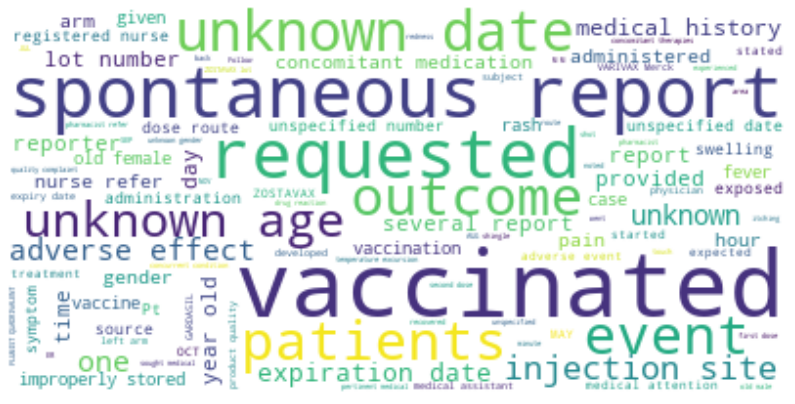

In [90]:
symptoms = WordCloud(
    background_color='white',
    max_words=3000,
    stopwords=stopwords
)

symptoms.generate(' '.join(df['SYMPTOM_TEXT'].astype(str)))


fig = plt.figure(figsize=(14, 18))

plt.imshow(symptoms, interpolation='bilinear')
plt.axis('off')
plt.show()

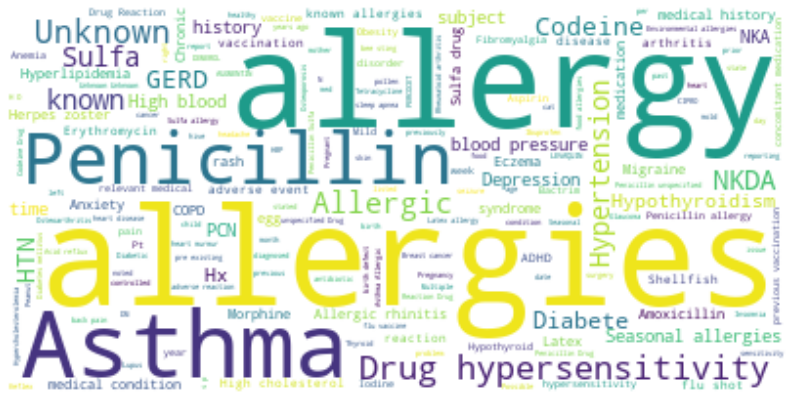

In [91]:
history = WordCloud(
    background_color='white',
    max_words=3000,
    stopwords=stopwords
)

history.generate(' '.join(df['HISTORY'].astype(str)))

fig = plt.figure(figsize=(14, 18))

plt.imshow(history, interpolation='bilinear')
plt.axis('off')
plt.show()

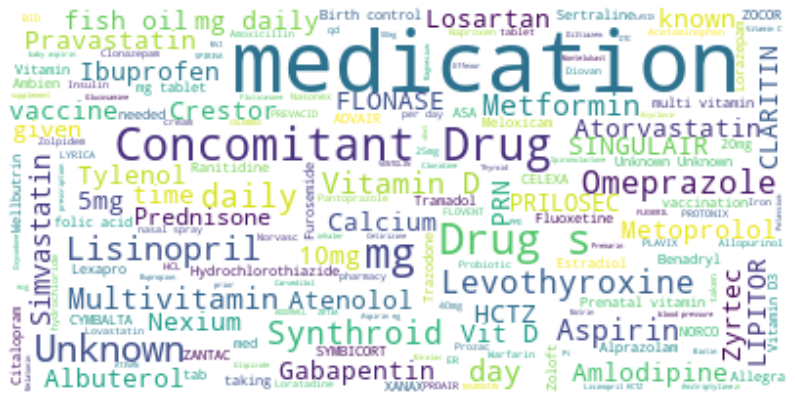

In [92]:
meds = WordCloud(
    background_color='white',
    max_words=3000,
    stopwords=stopwords
)

meds.generate(' '.join(df['OTHER_MEDS'].astype(str)))

fig = plt.figure(figsize=(14, 18))

plt.imshow(meds, interpolation='bilinear')
plt.axis('off')
plt.show()

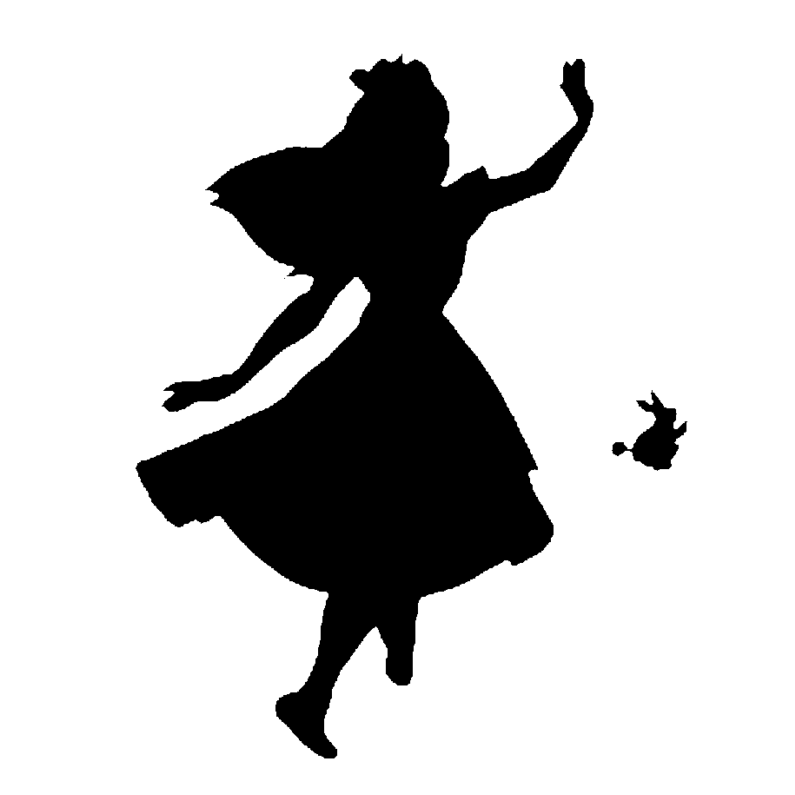

In [93]:
import numpy as np
import urllib
from PIL import Image
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

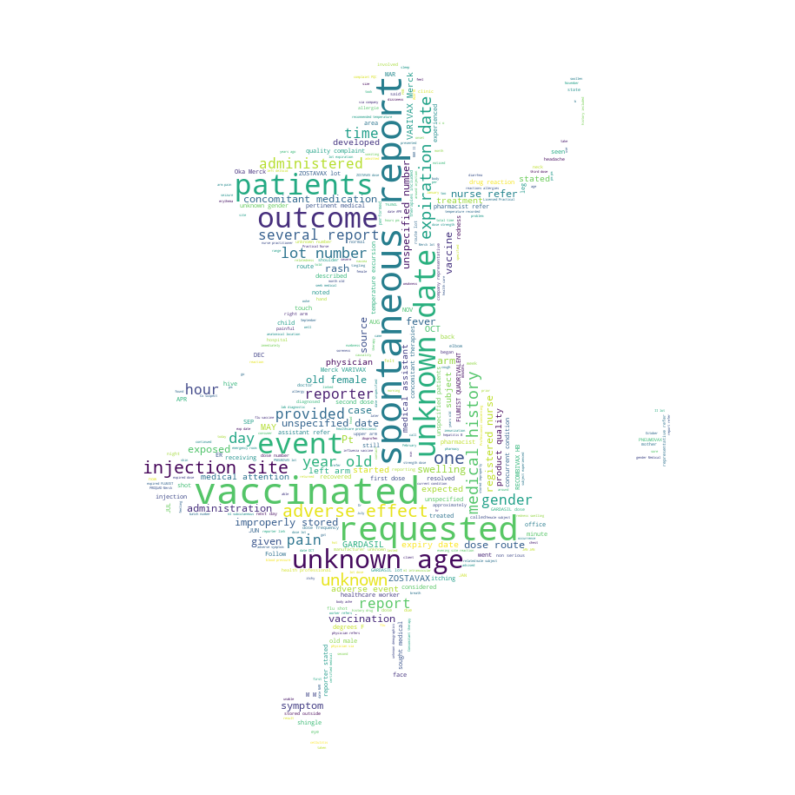

In [94]:
meds = WordCloud(
    background_color='white',
    mask=alice_mask,
    max_words=3000,
    stopwords=stopwords
)

meds.generate(' '.join(df['SYMPTOM_TEXT'].astype(str)))

# display the word cloud
fig = plt.figure(figsize=(14, 18))

#display the word cloud
plt.imshow(meds, interpolation='bilinear')
plt.axis('off')
plt.show()

In [95]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [98]:
# Loading the data

url = 'https://raw.githubusercontent.com/mturner49/data-viz-final-project/main/2014VAERSData.csv'
df = pd.read_csv(url, index_col=0, encoding='unicode_escape')
df.head()

RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX    RPT_DATE  \
VAERS_ID                                                                
518048    01/01/2014    OH    43.00     43.0      NaN   F  01/01/2014   
518049    01/01/2014    ME     1.11      1.0      0.1   M  01/01/2014   
518050    01/01/2014    TX    60.00     60.0      NaN   F  01/01/2014   
518051    01/01/2014    GA     0.78      0.0      0.8   M  01/01/2014   
518052    01/01/2014    TX    32.00     32.0      NaN   F  01/01/2014   

                                               SYMPTOM_TEXT DIED DATEDIED  \
VAERS_ID                                                                    
518048    Hot pain at injection site; fever; fatigue; he...  NaN      NaN   
518049                Red, hard bump at sight of injection.  NaN      NaN   
518050         Fast heart rate, head ache, weakness, fever.  NaN      NaN   
518051    Baby had a hard time swallowing food and bottl...  NaN      NaN   
518052    Severe ongoing headaches, severe vomiting afte...  NaN      NaN   

          ... CUR_ILL                                            HISTORY  \
VAERS_ID  ...                                                              
518048    ...    None                                 Allergy to Allegra   
518049    ...     NaN                                                NaN   
518050    ...      No  Kidney Transplant. Allergies: quine, penicilli...   
518051    ...      No  Low muscle tone, open PDA, Moderate Pulmonary ...   
518052    ...      No                                                 No   

         PRIOR_VAX  SPLTTYPE FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT  \
VAERS_ID                                                                    
518048         NaN       NaN         1         NaN          NaN       NaN   
518049         NaN       NaN         1         NaN          NaN       NaN   
518050         NaN       NaN         1         NaN          NaN       NaN   
518051         NaN       NaN         1         NaN          NaN       NaN   
518052         NaN       NaN         1         NaN          NaN       NaN   

         ER_ED_VISIT  ALLERGIES  
VAERS_ID                         
518048           NaN        NaN  
518049           NaN        NaN  
518050           NaN        NaN  
518051           NaN        NaN  
518052           NaN        NaN  

[5 rows x 34 columns]

In [99]:
# Dropping the null value records for missing States

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

df.dropna(subset = ["STATE"], inplace=True)

In [100]:
df.head()

RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX    RPT_DATE  \
VAERS_ID                                                                
518048    01/01/2014    OH    43.00     43.0      NaN   F  01/01/2014   
518049    01/01/2014    ME     1.11      1.0      0.1   M  01/01/2014   
518050    01/01/2014    TX    60.00     60.0      NaN   F  01/01/2014   
518051    01/01/2014    GA     0.78      0.0      0.8   M  01/01/2014   
518052    01/01/2014    TX    32.00     32.0      NaN   F  01/01/2014   

                                               SYMPTOM_TEXT DIED DATEDIED  \
VAERS_ID                                                                    
518048    Hot pain at injection site; fever; fatigue; he...  NaN      NaN   
518049                Red, hard bump at sight of injection.  NaN      NaN   
518050         Fast heart rate, head ache, weakness, fever.  NaN      NaN   
518051    Baby had a hard time swallowing food and bottl...  NaN      NaN   
518052    Severe ongoing headaches, severe vomiting afte...  NaN      NaN   

          ... CUR_ILL                                            HISTORY  \
VAERS_ID  ...                                                              
518048    ...    None                                 Allergy to Allegra   
518049    ...     NaN                                                NaN   
518050    ...      No  Kidney Transplant. Allergies: quine, penicilli...   
518051    ...      No  Low muscle tone, open PDA, Moderate Pulmonary ...   
518052    ...      No                                                 No   

         PRIOR_VAX  SPLTTYPE FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT  \
VAERS_ID                                                                    
518048         NaN       NaN         1         NaN          NaN       NaN   
518049         NaN       NaN         1         NaN          NaN       NaN   
518050         NaN       NaN         1         NaN          NaN       NaN   
518051         NaN       NaN         1         NaN          NaN       NaN   
518052         NaN       NaN         1         NaN          NaN       NaN   

         ER_ED_VISIT  ALLERGIES  
VAERS_ID                         
518048           NaN        NaN  
518049           NaN        NaN  
518050           NaN        NaN  
518051           NaN        NaN  
518052           NaN        NaN  

[5 rows x 34 columns]

In [101]:
# data frame to store total number of death after taking vaccine based on every state.

df_total_death = df.groupby('STATE')['DIED'].apply(lambda x: (x=='Y').sum()).reset_index(name='TOTAL')
df_total_death = df_total_death[df_total_death.TOTAL != 0]
df_total_death.head()

STATE  TOTAL
1    AL      2
2    AR      1
3    AZ      3
4    CA      2
5    CO      1

In [102]:
# Below map is showing the information about total death after taking vaccine based on states for year 2014

usa_countries = r'states.json' # geojson file
# create a plain Georgia map
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=3)

threshold_scale = np.linspace(df_total_death['TOTAL'].min(),
                              df_total_death['TOTAL'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1

usa_map.choropleth(
    geo_data=usa_countries,
    data=df_total_death,
    columns=['STATE', 'TOTAL'],
    key_on='feature.properties.STUSPS',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Death across USA after vaccine'
)

# display map
usa_map

In [103]:
# Calculating the total number of adverse effect cases reported based on every state for 2014 year.
df_total_cases = df.groupby('STATE').size().reset_index(name='TOTAL')
df_total_cases.head()

STATE  TOTAL
0    AK    101
1    AL    228
2    AR    225
3    AZ    574
4    CA   2704

In [108]:
# Below map is showing the information about total Cases of adverse effect after taking vaccine based on states for year 2014

usa_countries = r'states.json' # geojson file
# create a plain Georgia map
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=3)

threshold_scale = np.linspace(df_total_cases['TOTAL'].min(),
                              df_total_cases['TOTAL'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1

usa_map.choropleth(
    geo_data=usa_countries,
    data=df_total_cases,
    columns=['STATE', 'TOTAL'],
    key_on='feature.properties.STUSPS',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total number Adverse cases after vaccine per State'
)

# display map
usa_map

In [105]:


import plotly.express as px
px.strip(df, x="RECOVD", hover_name="STATE", color="SEX")

Text(0.5, 1.0, 'Histogram of Patient Ages')

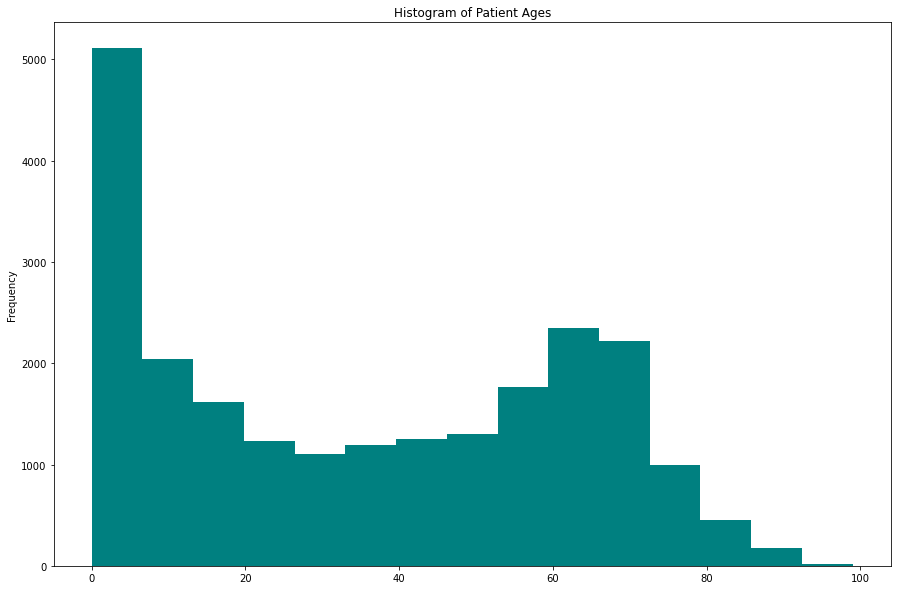

In [10]:
# Histogram showing number of Patient ages and frequency of cases reported after taking vaccine

df['AGE_YRS'].plot(kind = 'hist', figsize = (15,10), color = 'teal', bins=15)
plt.title('Histogram of Patient Ages')



### Based on the distribution, we can seee that people aged 0 - 18 are prone to adverse effects from the vaccines

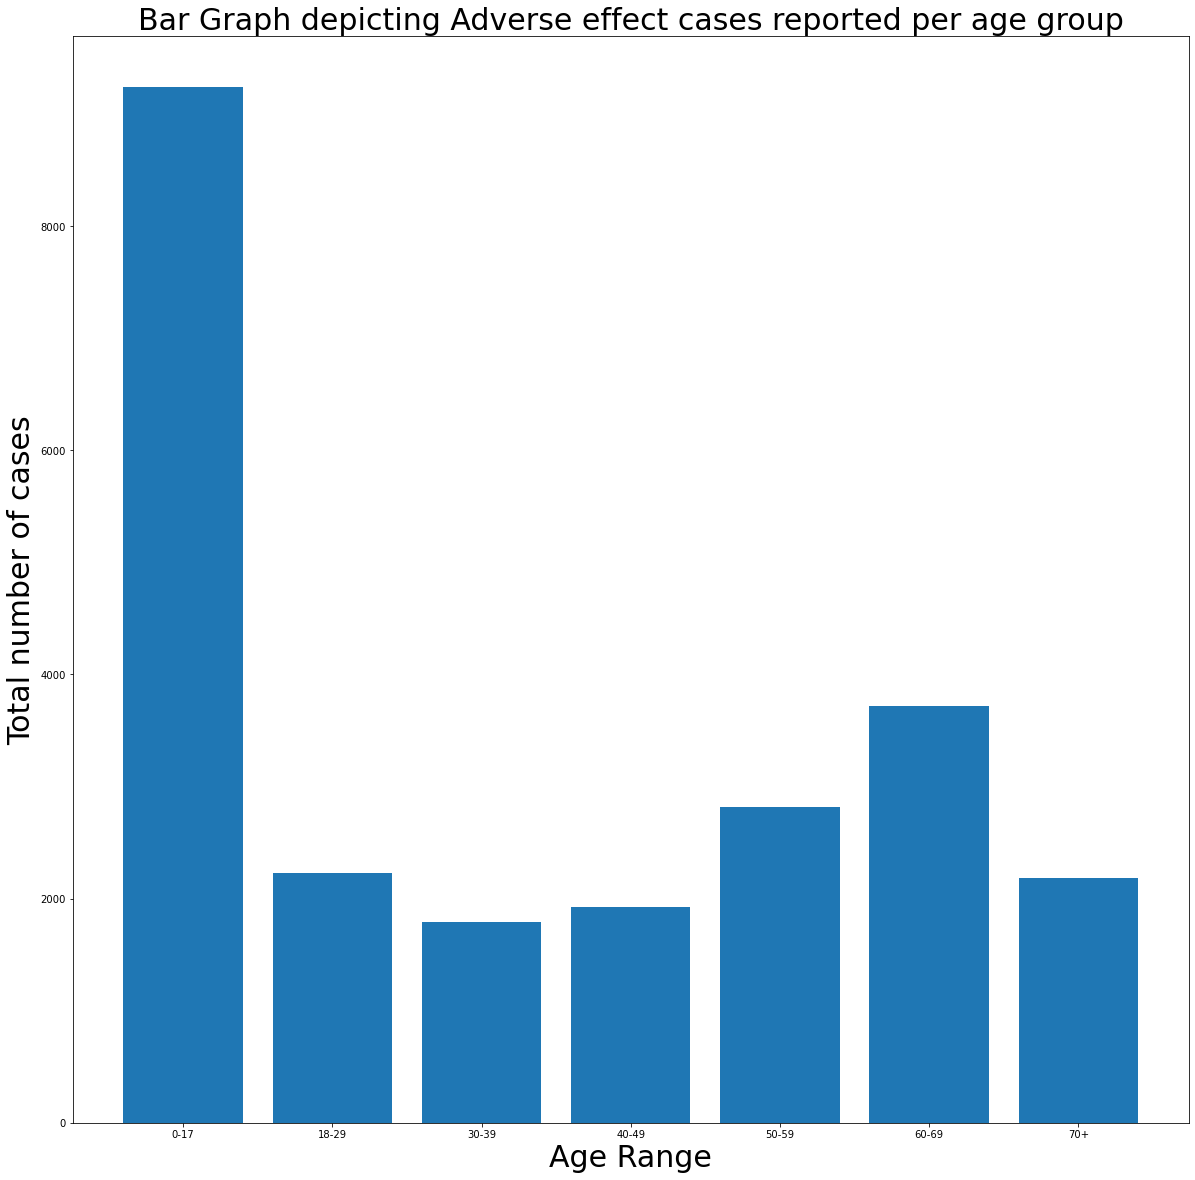

In [82]:
# Bar graph showing the information of adverse effect cases based on the age group

url = 'https://raw.githubusercontent.com/mturner49/data-viz-final-project/main/2014VAERSData.csv'
df = pd.read_csv(url, index_col=0, encoding='unicode_escape')

bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.CAGE_YR, bins, labels = labels,include_lowest = True)
df_total_vaccine_perAge = df.groupby('agerange')['FORM_VERS'].size().reset_index(name='TOTAL')

df_total_vaccine_perAge.head()
plt.figure(figsize=(20,20))
plt.xlabel('Age Range', fontsize = 30)
plt.ylabel('Total number of cases', fontsize = 30)
plt.title('Bar Graph depicting Adverse effect cases reported per age group', fontsize = 30)
plt.bar(df_total_vaccine_perAge['agerange'], df_total_vaccine_perAge['TOTAL'])
plt.show()

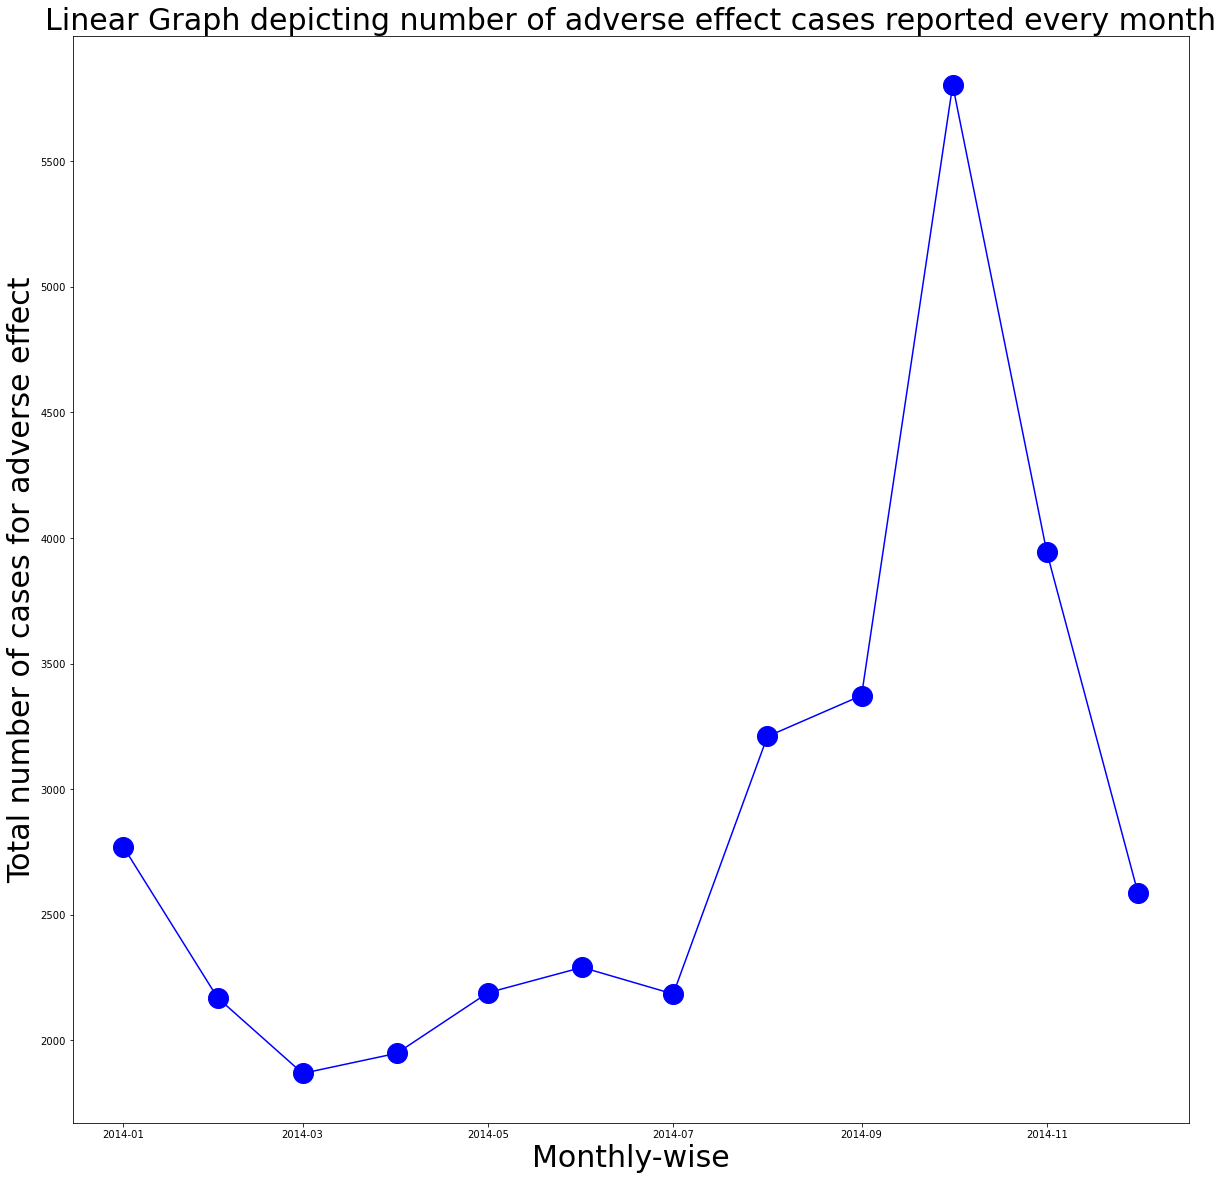

In [124]:
# Below is the line graph showing the information of the adverse effect cases reported every month after taking vaccine

url = 'https://raw.githubusercontent.com/mturner49/data-viz-final-project/main/2014VAERSData.csv'
df = pd.read_csv(url, index_col=0, encoding='unicode_escape')

df['RECVDATE'] = pd.to_datetime(df['RECVDATE'])
df = df.sort_values('RECVDATE', ascending = True).reset_index(drop=True)
df['RECVDATE_MON_YR'] = df['RECVDATE'].apply(lambda x: x.strftime('%B-%Y'))
df['RECVDATE_MON_YR'] = pd.to_datetime(df['RECVDATE_MON_YR'])
df = df.sort_values('RECVDATE_MON_YR', ascending = True).reset_index(drop=True)
df_total_vaccine_perMonth = df.groupby('RECVDATE_MON_YR')['FORM_VERS'].size().reset_index(name='TOTAL')
date_array  = df_total_vaccine_perMonth['RECVDATE_MON_YR']
price_array = df_total_vaccine_perMonth['TOTAL']
plt.figure(figsize=(20,20))
plt.xlabel('Monthly-wise', fontsize = 30)
plt.ylabel('Total number of cases for adverse effect', fontsize = 30)
plt.title('Linear Graph depicting number of adverse effect cases reported every month', fontsize = 30)
plt.plot(date_array, price_array, linestyle = 'solid', marker=".", markersize=40, color="blue")

In [123]:
# Scatter plot depicting duration of onset date of adverse effect based gender, age and State.
df_strip = df
df_strip['NUMDAYS'] = df_strip['NUMDAYS'].loc[df_strip['NUMDAYS']<4000]
px.strip(df_strip, x="NUMDAYS", y="AGE_YRS", hover_name="STATE", color="SEX")